<a href="https://colab.research.google.com/github/noyanika-vattathara/visualization/blob/main/2_EDA_%26_Visualization_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

1.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/sample_data/college_completion.csv', low_memory=False)
print( df.shape, '\n')
df.head()

(3798, 63) 



,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


2.

The dataset has 3798 observations/rows and 63 variables/columns. The variables included are index, unitid, chronname, city, state, level, control, basic, hbcu, flagship, long_x, lat_y, site, student_count, awards_per_value, awards_per_state_value, awards_per_natl_value, exp_award_value, exp_award_state_value, exp_award_natl_value, exp_award_percentile, ft_pct, fte_value, fte_percentile, med_sat_value, med_sat_percentile, aid_value, aid_percentile, endow_value, endow_percentile, grad_100_value, grad_100_percentile, grad_150_value, grad_150_percentile, pell_value, pell_percentile, retain_value, retain_percentile, ft_fac_value, ft_fac_percentile, vsa_year, vsa_grad_after4_first, vsa_grad_elsewhere_after4_first, vsa_enroll_after4_first, vsa_enroll_elsewhere_after4_first, vsa_grad_after6_first, vsa_grad_elsewhere_after6_first, vsa_enroll_after6_first, vsa_enroll_elsewhere_after6_first, vsa_grad_after4_transfer, vsa_grad_elsewhere_after4_transfer, vsa_enroll_after4_transfer, vsa_enroll_elsewhere_after4_transfer, vsa_grad_after6_transfer, vsa_grad_elsewhere_after6_transfer, vsa_enroll_after6_transfer, vsa_enroll_elsewhere_after6_transfer, similar, state_sector_ct, carnegie_ct, counted_pct, nicknames, and cohort_size.

3.

In [2]:
control_level_crosstab = pd.crosstab(df['control'], df['level'])
print(control_level_crosstab)


level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


There are more 2-year public institutions than 4-year public institutions, the number of 2-year & 4-year private for-profit institutions are relatively similar, and the number of 4-year private not-for-profit institutions is significantly higher than the number of 2-year private not-for-profit institutions.

4.

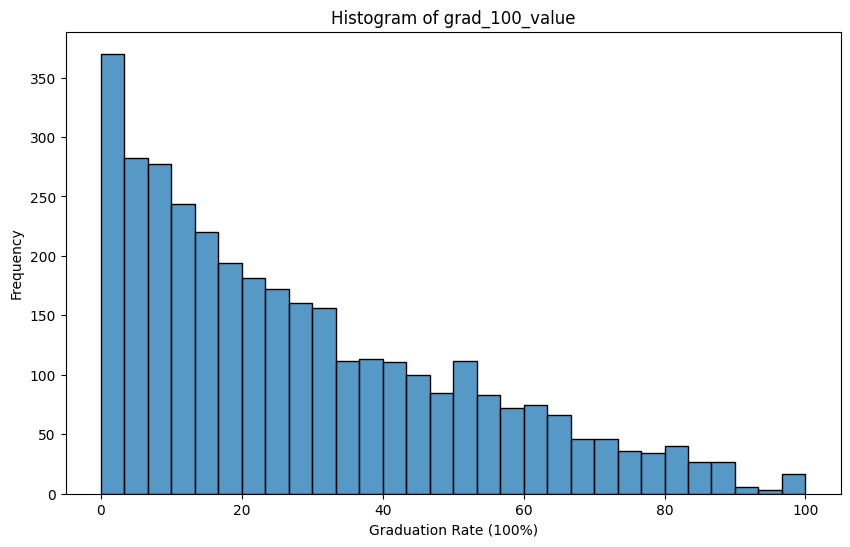

<ipython-input-12-614c91486565>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grad_100_value, shade=True)


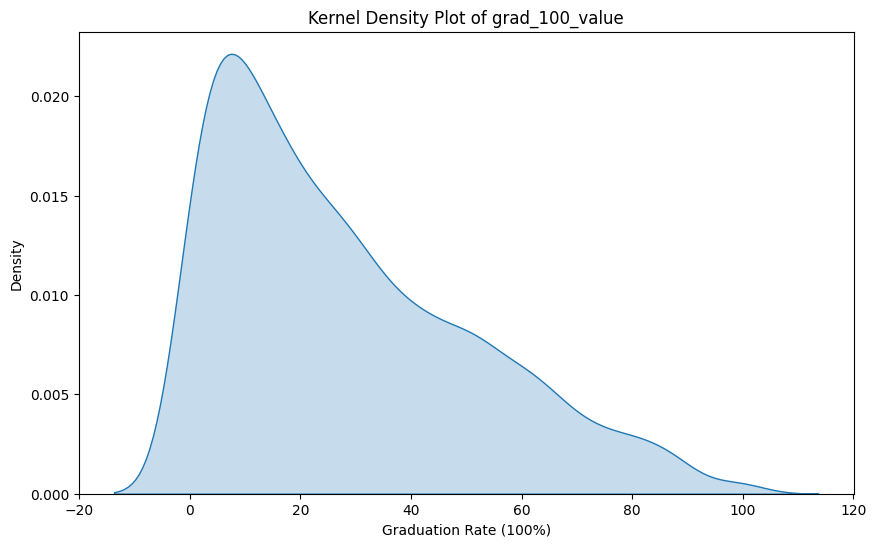

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


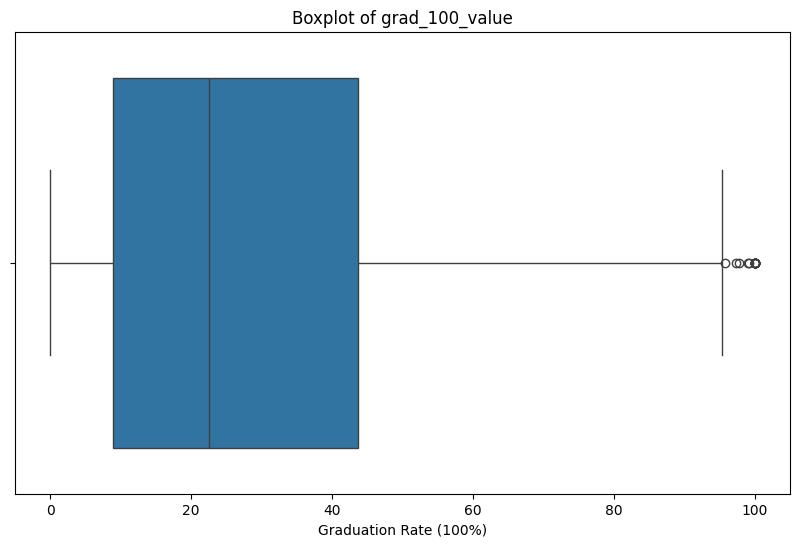

Statistical Description of grad_100_value:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [12]:
grad_100_value = df['grad_100_value']

# 1. Histogram
plt.figure(figsize=(10, 6))
sns.histplot(grad_100_value, bins=30, kde=False)
plt.title('Histogram of grad_100_value')
plt.xlabel('Graduation Rate (100%)')
plt.ylabel('Frequency')
plt.show()

# 2. Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(grad_100_value, shade=True)
plt.title('Kernel Density Plot of grad_100_value')
plt.xlabel('Graduation Rate (100%)')
plt.ylabel('Density')
plt.show()

# 3. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=grad_100_value)
plt.title('Boxplot of grad_100_value')
plt.xlabel('Graduation Rate (100%)')
plt.show()

# 4. Statistical Description
grad_100_description = grad_100_value.describe()
print("Statistical Description of grad_100_value:")
print(grad_100_description)


5.

<ipython-input-13-c72bc901634a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='grad_100_value', hue='control', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will 

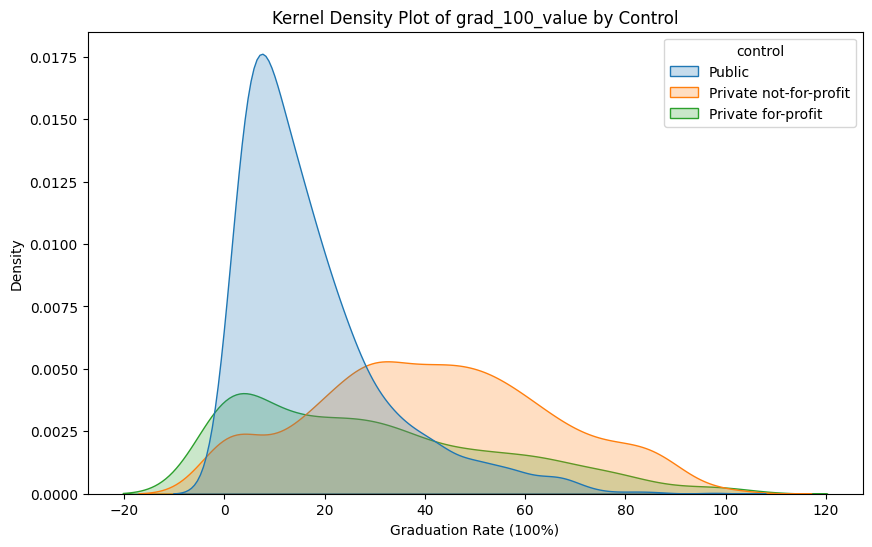

<ipython-input-13-c72bc901634a>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='grad_100_value', hue='level', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will n

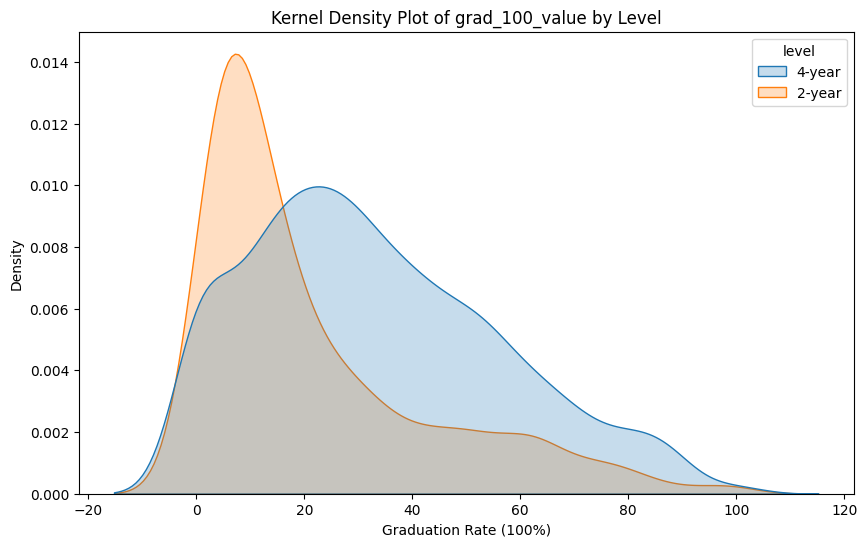

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', shade=True)
plt.title('Kernel Density Plot of grad_100_value by Control')
plt.xlabel('Graduation Rate (100%)')
plt.ylabel('Density')
plt.show()

# 2. Grouped Kernel Density Plot by 'level'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='level', shade=True)
plt.title('Kernel Density Plot of grad_100_value by Level')
plt.xlabel('Graduation Rate (100%)')
plt.ylabel('Density')
plt.show()

1st grouped kernel density plot: Private not-for-profit institutions seem to provide better outcomes in terms of graduation rates- they have a wider spread, and the peak is at around 40% which is higher than the other types of institutions. Public institutions seem to have more concentrated lower graduation rates. Private institutions have a peak about the same rate as public institutions (maybe a little bit lower), but a wider distribution.

2nd grouped kernel density plot: Both 2-year and 4-year institutions have a spread reaching 100, but 4-year institutions seem to be better- they have a peak that is at a higher graduation rate than the peak of the 2-year institutions curve and also seems to have more evenly distributed graduation rates, whereas the graduation rates of 2-year institutions seem to be concentrated at 0-20%.


6.

<ipython-input-14-88b22bbb8012>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you

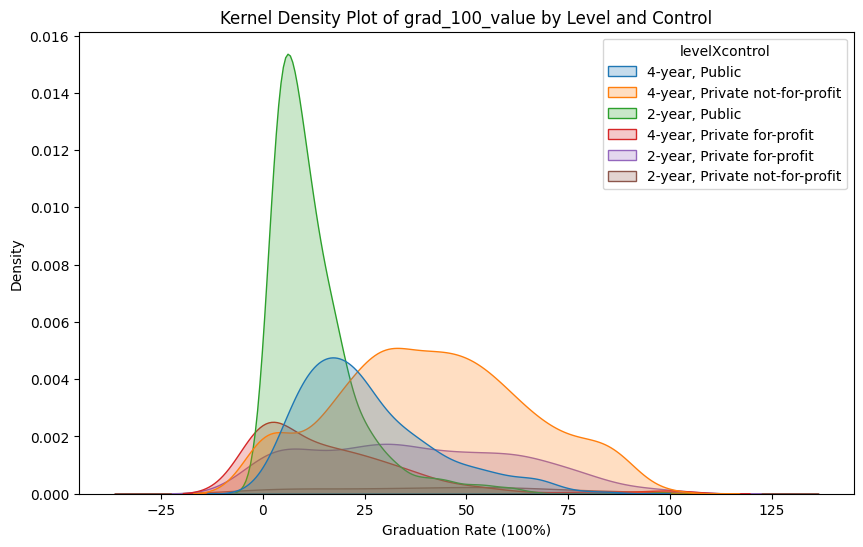

In [14]:
df['levelXcontrol'] = df['level'] + ', ' + df['control']

# Step 2: Grouped Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', shade=True)
plt.title('Kernel Density Plot of grad_100_value by Level and Control')
plt.xlabel('Graduation Rate (100%)')
plt.ylabel('Density')
plt.show()


4-year, private not-for-profit institutions seem to have the best graduation rates- they have a more wide distribution, more evenly distributed, and a significant concentration of data points at the peak. The peak is also at a higher graduation rate value than the other curves.

7.

<ipython-input-15-2bec747f99fc>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='aid_value', shade=True)


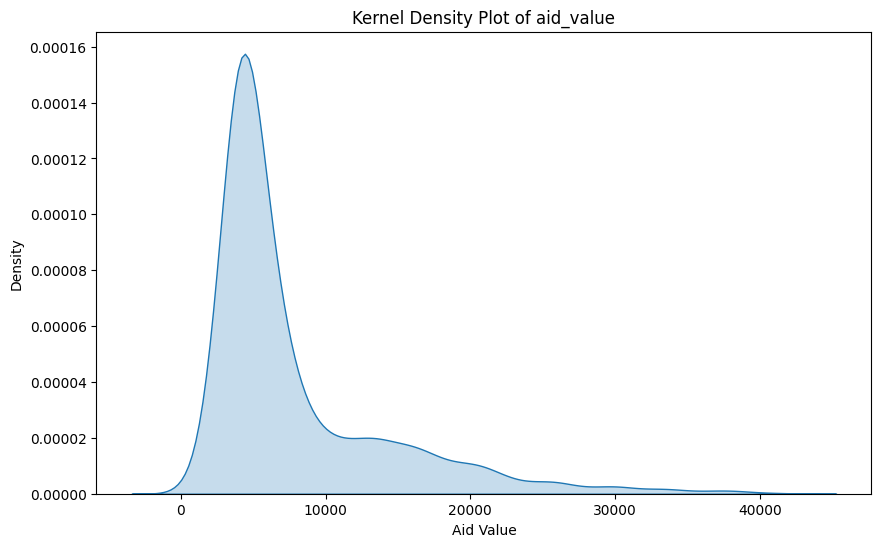

<ipython-input-15-2bec747f99fc>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol', shade=True)  # Using levelXcontrol created earlier
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

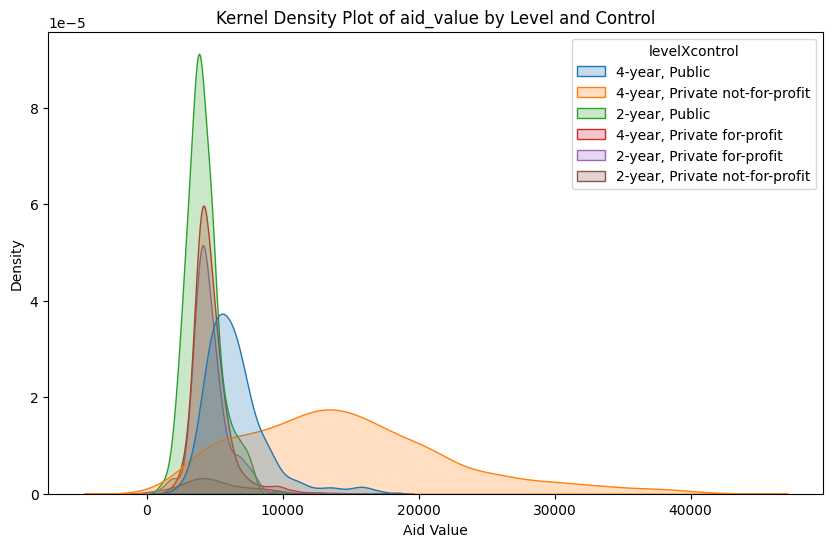

                                count          mean          std     min  \
control                level                                               
Private for-profit     2-year   464.0   4559.681034  1286.688269   294.0   
                       4-year   527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year    68.0   5128.058824  2590.449946   934.0   
                       4-year  1180.0  14702.401695  7649.775203   902.0   
Public                 2-year   926.0   4126.199784  1260.271382   881.0   
                       4-year   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3818.75   4286.5   5122.00   9727.0  
                       4-year  3885.50   4364.0   5131.50  18355.0  
Private not-for-profit 2-year  3650.00   4516.5   6311.50  13654.0  
                       4-year  9113.25  13774.

In [15]:
# Kernel Density Plot for aid_value
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='aid_value', shade=True)
plt.title('Kernel Density Plot of aid_value')
plt.xlabel('Aid Value')
plt.ylabel('Density')
plt.show()
# Grouped Kernel Density Plot by 'level' and 'control'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol', shade=True)  # Using levelXcontrol created earlier
plt.title('Kernel Density Plot of aid_value by Level and Control')
plt.xlabel('Aid Value')
plt.ylabel('Density')
plt.show()
aid_value_calc = df.groupby(['control', 'level'])['aid_value'].describe()
print(aid_value_calc)


The shape of the graph is primarily influenced by institution type and level: private not-for-profit institutions tend to offer higher aid values, maybe because they have larger tuition costs & also are more inclined to prioritize financial support to students over profit. Public institutions have lower tuition so they tend to offer less aid. Private for-profit institutions also tend to offer less aid maybe because they are less inclined to provide financial support to students and more focused on profit generation. 2-year institutions have lower aid vaues than 4-year institutions, maybe because their tuition revenue is lower.


8.

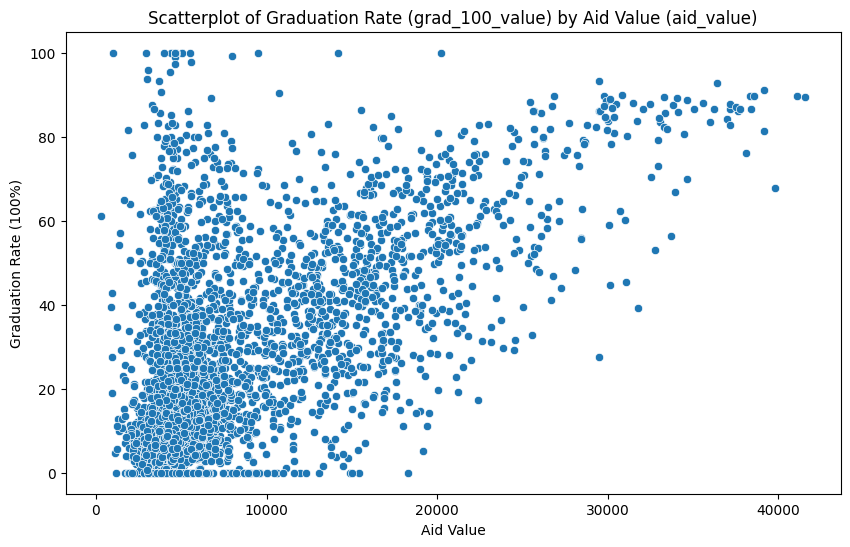

In [17]:
# Scatterplot of grad_100_value by aid_value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aid_value', y='grad_100_value', data=df)
plt.title('Scatterplot of Graduation Rate (grad_100_value) by Aid Value (aid_value)')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (100%)')
plt.show()


Graduation rates tend to rise when aid value rises.

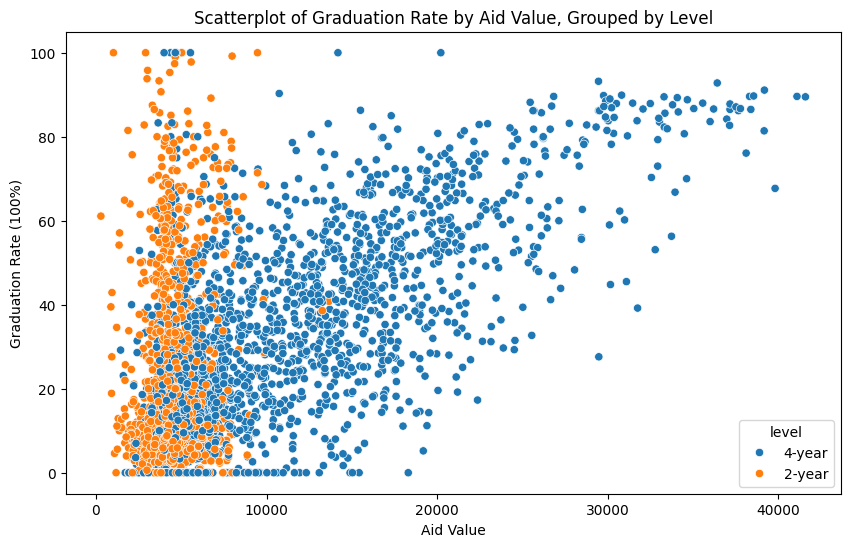

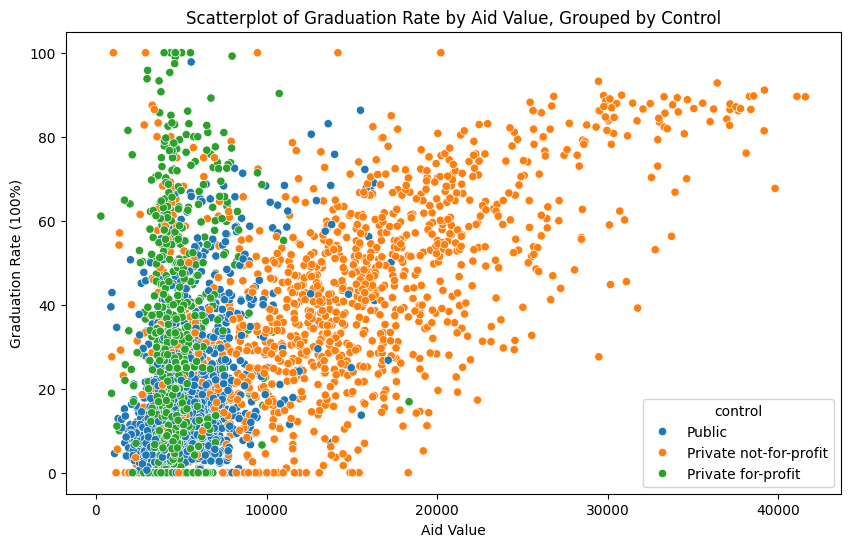

In [18]:
# Scatterplot grouped by level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aid_value', y='grad_100_value', hue='level', data=df)
plt.title('Scatterplot of Graduation Rate by Aid Value, Grouped by Level')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (100%)')
plt.show()
# Scatterplot grouped by control
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aid_value', y='grad_100_value', hue='control', data=df)
plt.title('Scatterplot of Graduation Rate by Aid Value, Grouped by Control')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (100%)')
plt.show()


Private not-for-profit institutions tend to have higher aid values and as these aid values increase, graduation rates increase. 4-year institutions tend to have higher aid values and as these aid values increase, graduation rates increase.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

1. https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-medicaid-opioid-prescribing-rates/medicaid-opioid-prescribing-rates-by-geography/data
2. The data FAQ section describes why some states are missing data at the county- and zip- level; The data is sourced from the Transformed Medicaid Statistical Information System Analytic Files (TAF), which had to pass state-level quality checks to be included in the tool. If a state's data did not meet these quality standards, its county and zip-level data were excluded. Additionally, only data from 2016 onward is used due to quality concerns with earlier years. I think the description does a good job of explaining other tools that complement the dataset like the interactive online Medicaid Mapping Tool as well as detailing gaps in the data for contextualization and more faithful representation.
3. I found the Opioid_Prscrbng_Rate (Opioid prescribing rate), Geo_Desc (Geographic description), and LA_Opioid_Prscrbng_Rate (Long-acting opioid prescribing rate) to be interesting variables in understanding the relationships between states/geographic area and differences in rates of prescription.



In [1]:
import pandas as pd
data = pd.read_csv("/content/sample_data/Medicaid Opioid Data.csv", low_memory=False)
#coerce below variables to numeric
data['LA_Opioid_Prscrbng_Rate'] = pd.to_numeric(data['LA_Opioid_Prscrbng_Rate'], errors='coerce')
data['Opioid_Prscrbng_Rate'] = pd.to_numeric(data['Opioid_Prscrbng_Rate'], errors='coerce')
# Remove rows with missing or negative/zero values
filtered_data = data[(data['LA_Opioid_Prscrbng_Rate'] > 0) & (data['Opioid_Prscrbng_Rate'] > 0)]
filtered_data.head()

,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2013,National,,National,All,33471552.0,506882862.0,6.60,NaN,NaN,2605496.0,7.78,NaN,NaN
1,2013,National,,National,FFS,15528221.0,240661427.0,6.45,NaN,NaN,1363671.0,8.78,NaN,NaN
2,2013,National,,National,MC,17943331.0,266221435.0,6.74,NaN,NaN,1241825.0,6.92,NaN,NaN
3,2013,State,56,Wyoming,All,41202.0,529696.0,7.78,NaN,NaN,4230.0,10.27,NaN,NaN
4,2013,State,38,North Dakota,All,39906.0,588978.0,6.78,NaN,NaN,3472.0,8.70,NaN,NaN


4.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


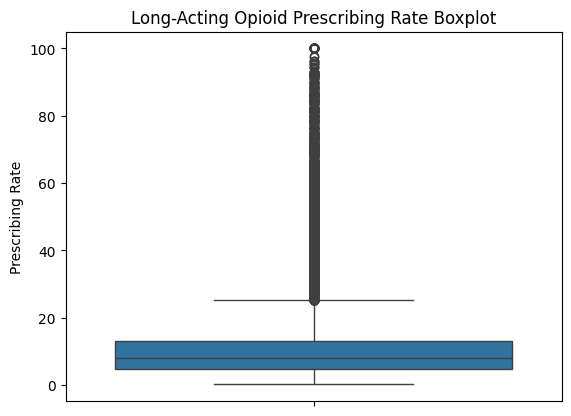

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


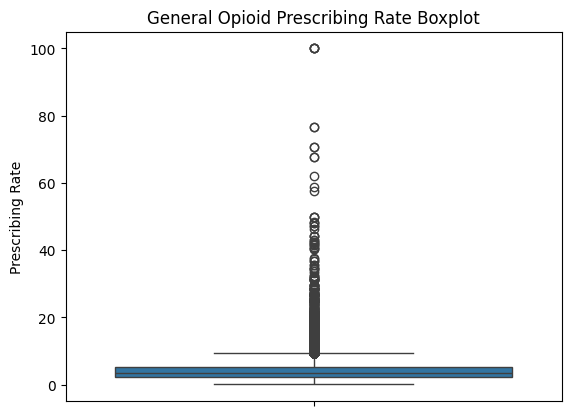

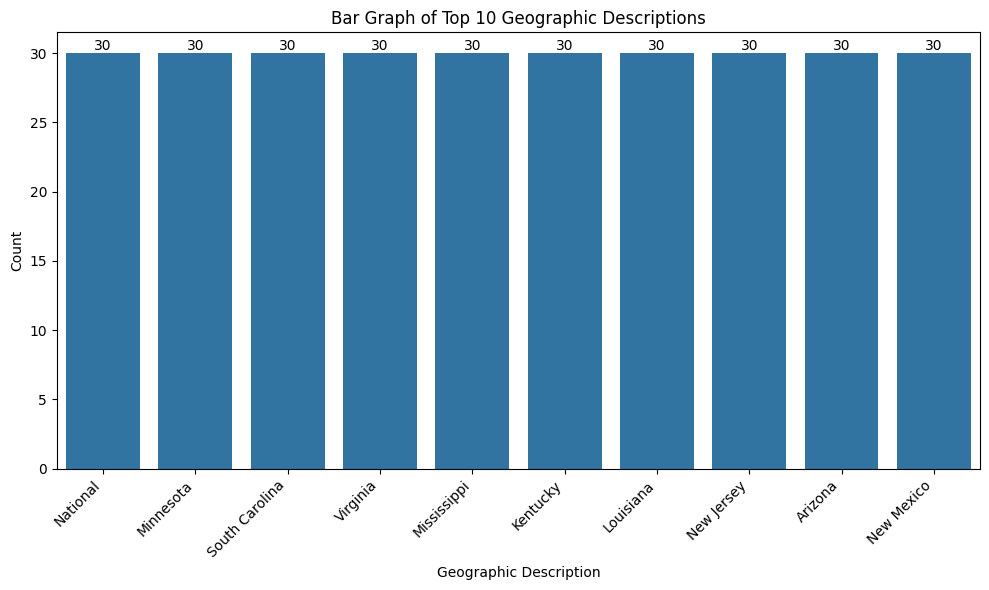

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#first boxplot
sns.boxplot(y=filtered_data['LA_Opioid_Prscrbng_Rate'])
plt.title('Long-Acting Opioid Prescribing Rate Boxplot')
plt.ylabel('Prescribing Rate')
plt.show()
#second boxplot
sns.boxplot(y=filtered_data['Opioid_Prscrbng_Rate'])
plt.title('General Opioid Prescribing Rate Boxplot')
plt.ylabel('Prescribing Rate')
plt.show()
#bar graph- initial graph had too many categories, below code from Chat.GPT 4.0 plots the top 10 most frequent categories
top_n = 10
top_geo_desc = filtered_data['Geo_Desc'].value_counts().nlargest(top_n)
# Create a bar plot for the top N categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_geo_desc.index, y=top_geo_desc.values)
# Adding exact value labels to bar generated from Chat.GPT 4.0
for index, value in enumerate(top_geo_desc.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title(f'Bar Graph of Top {top_n} Geographic Descriptions')
plt.xlabel('Geographic Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



There are some outliers in the boxplots near the 100 value on the y-axis, the bar graph seems to have no outliers but this conclusion is based off of limited data since I wasn't able to plot all geographic categories due to space.

5.

Text(0, 0.5, 'Frequency')

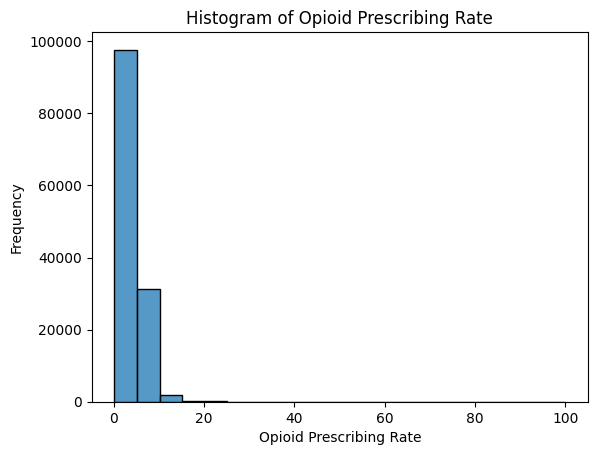

In [8]:
sns.histplot(filtered_data['Opioid_Prscrbng_Rate'], bins=20)
plt.title('Histogram of Opioid Prescribing Rate')
plt.xlabel('Opioid Prescribing Rate')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

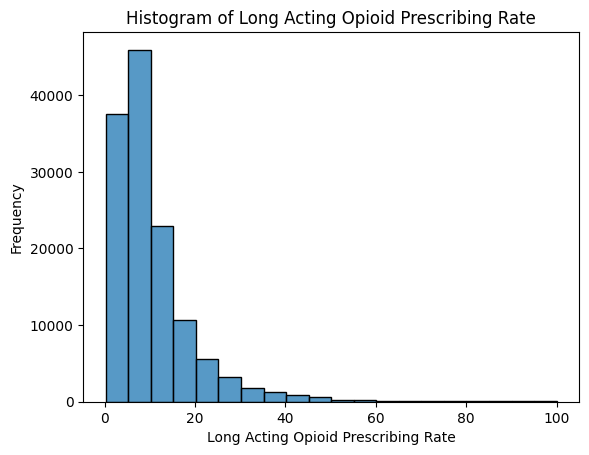

In [9]:
sns.histplot(filtered_data['LA_Opioid_Prscrbng_Rate'], bins=20)
plt.title('Histogram of Long Acting Opioid Prescribing Rate')
plt.xlabel('Long Acting Opioid Prescribing Rate')
plt.ylabel('Frequency')

Both graphs exhibit pretty skewed distributions as the majority of the data points are concentrated on the left side of the plot, with a large frequency of opioid prescribing rates between 0 and 20. The Long Acting Opioid plot is less positively skewed than the General Opioid Prescription Rate plot. A log or square root transformation might help with these problems.


6.

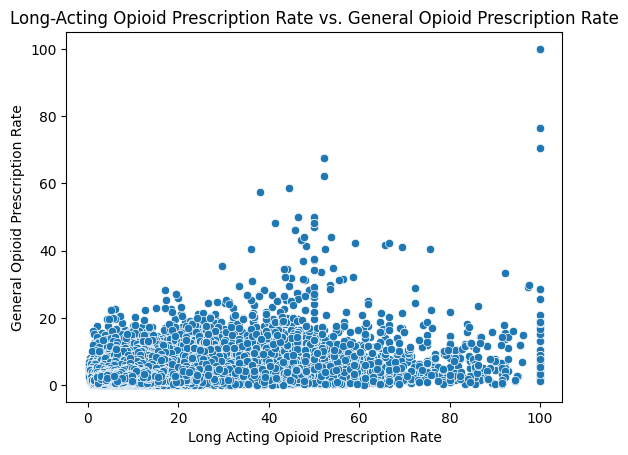

In [10]:
sns.scatterplot(x='LA_Opioid_Prscrbng_Rate', y='Opioid_Prscrbng_Rate', data=filtered_data)
plt.title('Long-Acting Opioid Prescription Rate vs. General Opioid Prescription Rate')
plt.xlabel('Long Acting Opioid Prescription Rate')
plt.ylabel('General Opioid Prescription Rate')
plt.show()


The scatter plot shows some clustering of lower rates but no strong linear relationship between long-acting opioid prescribing and general opioid prescribing. This may indicate that factors other than geographic description and general prescribing practices are influencing long-acting opioid prescriptions. Outliers may represent regions with unique prescription/medical policy or different patient demographics.

7.

In [12]:
#summarize numerical variables
summary_data = data[['Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate']].describe()
print(summary_data)
#table for Geo_Desc
geo_desc_freq = data['Geo_Desc'].value_counts()
print(geo_desc_freq)



       Opioid_Prscrbng_Rate  LA_Opioid_Prscrbng_Rate
count         307463.000000            199793.000000
mean               3.530889                 6.976763
std                3.020129                 9.190996
min                0.000000                 0.000000
25%                1.640000                 0.000000
50%                3.110000                 4.670000
75%                4.760000                 9.920000
max              100.000000               100.000000
Geo_Desc
National                       30
South Carolina                 30
Connecticut                    30
Alabama                        30
Minnesota                      30
                               ..
Virginia:Accomack:23441         3
Virginia:Suffolk City:23439     3
Virginia:Rockingham:22846       3
Virginia:Southampton:23829      3
Texas:San Jacinto:77328         3
Name: count, Length: 33207, dtype: int64


The median for long acting opioid prescribing rate variable is 4.67, which is higher than the general opioid prescribing median, suggesting that long-acting opioids may be prescribed more frequently in certain regions. The frequency table for the Geo_Desc variable shows that each category has a relatively low number of occurrences, indicating that the data is spread across many small or very specific geographic areas. It also indicates that cleaning might need to address the fact that some categories are general states and others are specific cities within states.

